#Ayush Vadalia
#60009220096
#D1-1

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv('/content/FB (2).csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


In [ ]:
#Making a copy of the data for Close column for train/split
X = df['Close']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

In [ ]:
#Function for calculating evaluation metrics to understand how far off our forecasts are against the actuals
#Closer to 0 better the model
#RMSE and MAPE are notable statistics measures used to check the accurcy of forecasting model.

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    #instead of using append,use pd.concat to add the new row
    temp_df = pd.concat([temp_df,pd.DataFrame([df3])], ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 14123.11196903136
MAE is : 118.76366943333332
RMSE is : 118.84069996861918
MAPE is : 60.79708542749399
R2 is : -770.6370351163115

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 130.19890782430633
MAE is : 10.578096050945016
RMSE is : 11.41047360210374
MAPE is : 5.371184257014935
R2 is : -6.113609198116427

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 108.84519758407878
MAE is : 9.515377334756147
RMSE is : 10.432890183648958
MAPE is : 4.826729569629682
R2 is : -4.946917770998036

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 101.81858360183577
MAE is : 9.13869749146715
RMSE is : 10.090519491177636
MAPE is : 4.633748018445831
R2 is : -4.563008361226736

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 101.76016636355348
MAE is : 9.135500785521595
RMSE is : 10.087624416261416
MAPE is : 4.632110274130487
R2 is : -4.55981664932594


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress

,smoothing parameter,RMSE
10,1.0,9.878157
9,0.9,9.926882
8,0.8,10.008074
4,0.4,10.087624
7,0.7,10.088978
3,0.3,10.090519
5,0.5,10.136144
6,0.6,10.139199
2,0.2,10.432890
1,0.1,11.410474


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 1.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 97.57797868071496
MAE is : 8.90366143333332
RMSE is : 9.878156643864024
MAPE is : 4.513333762437967
R2 is : -4.331316662144517



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 97.68044511489337
MAE is : 8.90941374915351
RMSE is : 9.88334179895107
MAPE is : 4.51628080314019
R2 is : -4.336915066776707



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,1229
Model:,SimpleExpSmoothing,SSE,8965.774
Optimized:,True,AIC,2446.285
Trend:,None,BIC,2456.513
Seasonal:,None,AICC,2446.318
Seasonal Periods:,None,Date:,"Thu, 26 Sep 2024"
Box-Cox:,False,Time:,07:46:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9808446,alpha,True
initial_level,76.519997,l.0,False


**Summary Result Explained**
**Dep. Variable: endog:** This denotes the dependent variable or the time series data being modeled. “endog” refers to the endogenous variable, which is the data you are forecasting.

**No. Observations: 1229:** This indicates the number of data points (time periods) used in the model. Here, you have 1,229 observations.

**Model: SimpleExpSmoothing:** This confirms that the model being used is Simple Exponential Smoothing.

**SSE: 8965.774:** SSE stands for Sum of Squared Errors, which measures the discrepancy between the actual values and the values predicted by the model. A lower SSE indicates a better fit.

**Optimized: True:** This indicates that the model parameters were optimized during the fitting process to minimize the error.

**AIC: 2446.285:** AIC stands for Akaike Information Criterion. It is a measure used to compare different models, considering both the goodness of fit and the model complexity. Lower AIC values suggest a better model.

**BIC: 2456.513:** BIC stands for Bayesian Information Criterion. Like AIC, it is used for model comparison, but it includes a stronger penalty for the number of parameters. Lower BIC values indicate a better model.

AICC: 2446.318: AICC is a version of AIC that includes a correction for small sample sizes. It is useful when the sample size is small relative to the number of parameters.

Trend: None: Indicates that the model does not account for any trend in the data. Simple Exponential Smoothing assumes no trend.

Seasonal: None: Indicates that the model does not account for seasonality. Simple Exponential Smoothing assumes no seasonal patterns.

Seasonal Periods: None: This further confirms that the model does not include any seasonal effects.

Box-Cox: False: Box-Cox transformations are used to stabilize variance and make the data more normally distributed. Here, it was not applied.

Box-Cox Coeff.: None: Since Box-Cox was not used, there are no coefficients for this transformation.

coeff: Lists the coefficients used in the model.

smoothing_level: 0.9808445: This is the smoothing parameter (often denoted as alpha) used in the model. It controls the weight given to the most recent observation. A value close to 1 indicates that the model relies heavily on recent data.

initial_level: 76.525895: This is the initial level of the time series used to start the smoothing process.

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

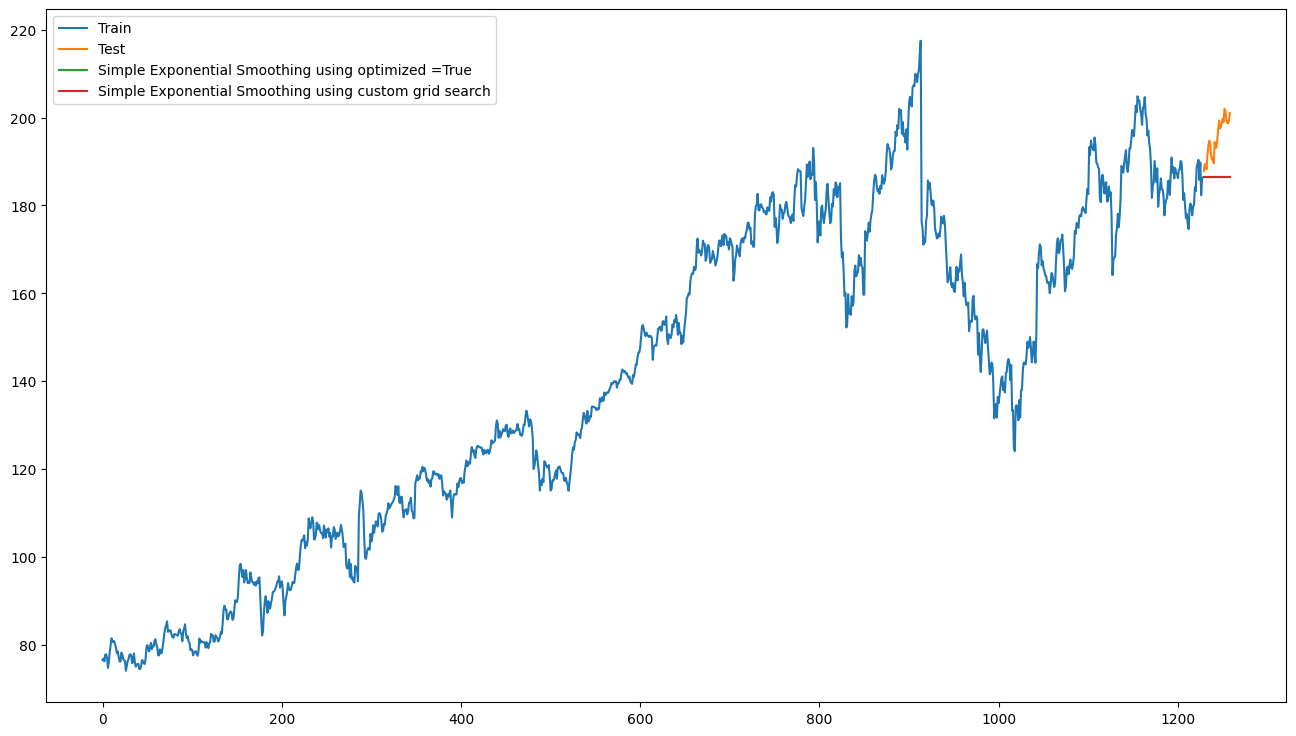

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

## Conclusion and Summary
The experiment aimed to forecast Facebook stock prices using Simple Exponential Smoothing (SES) with different smoothing parameters.

**Key Observations:**
- Grid search and automated optimization techniques were used to find the best smoothing parameter for SES.
- The automated smoothing parameter selection (optimized=True) yielded the best result with RMSE (Root Mean Squared Error), and it provided lower errors than the grid search method.
- The automated approach might be preferred because it simplifies model tuning and can be readily incorporated into a prediction pipeline.
- The visualization of the model's forecast compared to actual data provided a clear picture of model accuracy and how it captured the trend of Facebook stock prices.

**Summary of Findings:**
- Simple Exponential Smoothing can be a relatively effective technique for forecasting time series data like Facebook stock prices, when the trend is not significant.
- Choosing an appropriate smoothing parameter is crucial for SES's performance. Automation through optimization methods can be a practical approach to finding the optimal parameter.
- Evaluation metrics such as RMSE, MAE, MAPE, and R-squared can be used to compare different forecasting models and determine the best approach.

**Further Exploration:**
- Applying more sophisticated forecasting models like ARIMA, SARIMA, or Prophet could be beneficial for capturing more complex trends and seasonality in stock prices.
- Examining other factors that influence stock prices (e.g., news sentiment, economic indicators) could improve model accuracy.